In [88]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [89]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("final_data.csv")

In [90]:
# Create a new DataFrame with the filter applied
goalkeepers_df = df[(df['position'] == 'Goalkeeper') & (df['position_encoded'] == 1)]

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [91]:
goalkeepers_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
32,/alphonse-areola/profil/spieler/120629,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,...,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0
33,/lukasz-fabianski/profil/spieler/29692,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,...,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0


In [92]:
goalkeepers_df.shape

(1229, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [93]:
goalkeepers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1229 entries, 0 to 10728
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               1229 non-null   object 
 1   team                 1229 non-null   object 
 2   name                 1229 non-null   object 
 3   position             1229 non-null   object 
 4   height               1229 non-null   float64
 5   age                  1229 non-null   float64
 6   appearance           1229 non-null   int64  
 7   goals                1229 non-null   float64
 8   assists              1229 non-null   float64
 9   yellow cards         1229 non-null   float64
 10  second yellow cards  1229 non-null   float64
 11  red cards            1229 non-null   float64
 12  goals conceded       1229 non-null   float64
 13  clean sheets         1229 non-null   float64
 14  minutes played       1229 non-null   int64  
 15  days_injured         1229 non-null   int64

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [94]:
goalkeepers_df.drop(["player"],axis=1,inplace=True)

In [95]:
goalkeepers_df.drop(["winger"],axis=1,inplace=True)

In [96]:
goalkeepers_df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1
32,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.0,0.898502,0.449251,3606,34,4,16,8000000,17500000,1
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [97]:
goalkeepers_df.duplicated().sum()

np.int64(0)

In [98]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [99]:
#Display number missing values per column
goalkeepers_df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
dtype: int64

In [100]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [101]:
goalkeepers_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [102]:
goalkeepers_df['age'] = goalkeepers_df['age'].astype('int64')

In [103]:
goalkeepers_df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1


In [104]:
goalkeepers_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
dtype: object

In [105]:
# go to clean them 

In [106]:
# check outliers 

### Correcting errors

-------------------

In [107]:
goalkeepers_df.rename(columns={
    'current_value': 'Valuated_price (Euro)',
    'highest_value': 'Highest_valuated_price (Euro)'
}, inplace=True)

In [108]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [109]:
categorical_features = ['team', 'position', 'position_encoded', 'appearance']
numeric_features = ['age', 'appearance', 'red cards', 'minutes played', 'days_injured']

In [110]:
filtered_df = goalkeepers_df[(goalkeepers_df['height'] >= 180) & 
                  (goalkeepers_df['height'] <= 200)]

fig = px.histogram(filtered_df, 
                   x='height', 
                   labels={'height': 'height'},
                   nbins=100)

fig.show()

In [111]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['height'] >= 180) & (goalkeepers_df['height'] <= 200)]

In [112]:
goalkeepers_df.shape

(1204, 20)

In [113]:
filtered_df = goalkeepers_df[(goalkeepers_df['age'] >= 18) & 
                  (goalkeepers_df['age'] <= 40)]

fig = px.histogram(filtered_df, 
                   x='age', 
                   labels={'age': 'age'},
                   nbins=100)

fig.show()

In [114]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['age'] >= 18) & (goalkeepers_df['age'] <= 40)]

In [115]:
goalkeepers_df.shape

(1184, 20)

In [116]:
fig = px.box(goalkeepers_df, y = 'Highest_valuated_price (Euro)')
fig.show()

In [117]:
filtered_df = goalkeepers_df[(goalkeepers_df['Highest_valuated_price (Euro)'] > 200000) & 
                  (goalkeepers_df['Highest_valuated_price (Euro)'] <= 10000000)]

fig = px.histogram(filtered_df, 
                   x='Highest_valuated_price (Euro)', 
                   labels={'Highest_valuated_price (Euro)': 'Highest_valuated_price (Euro)'},
                   nbins=100)

fig.show()

In [118]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['Highest_valuated_price (Euro)'] > 200000) & (goalkeepers_df['Highest_valuated_price (Euro)'] <= 10000000)]

In [119]:
goalkeepers_df.shape

(758, 20)

In [120]:
fig = px.box(goalkeepers_df, y = 'Valuated_price (Euro)')
fig.show()

In [121]:
filtered_df = goalkeepers_df[(goalkeepers_df['Valuated_price (Euro)'] > 200000) & 
                  (goalkeepers_df['Valuated_price (Euro)'] <= 10000000)]

fig = px.histogram(filtered_df, 
                   x='Valuated_price (Euro)', 
                   labels={'Valuated_price (Euro)': 'Valuated Price (Euro)'},
                   nbins=100)

fig.show()

In [122]:
goalkeepers_df = goalkeepers_df[(goalkeepers_df['Valuated_price (Euro)'] > 200000) & (goalkeepers_df['Valuated_price (Euro)'] <= 10000000)]

In [123]:
goalkeepers_df.shape

(617, 20)

2.Feature engineering

In [124]:
goalkeepers_df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,Valuated_price (Euro),Highest_valuated_price (Euro),position_encoded
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1


In [125]:
categorical_features

['team', 'position', 'position_encoded', 'appearance']

In [126]:
goalkeepers_df = pd.get_dummies(goalkeepers_df, columns=categorical_features)

In [127]:
#goalkeepers_df.drop(["team"],axis=1,inplace=True)

In [128]:
goalkeepers_df.drop(["name"],axis=1,inplace=True)

In [129]:
#goalkeepers_df.drop(["position"],axis=1,inplace=True)

In [130]:
goalkeepers_df.shape

(617, 456)

3. Feature selection

In [131]:
correlation = goalkeepers_df.corr()
print(correlation['Valuated_price (Euro)'].sort_values(ascending=False))

Valuated_price (Euro)            1.000000
Highest_valuated_price (Euro)    0.671785
minutes played                   0.331472
team_RC Strasbourg Alsace        0.176137
appearance_82                    0.175523
                                   ...   
age                             -0.102089
appearance_0                    -0.102468
assists                               NaN
position_Goalkeeper                   NaN
position_encoded_1                    NaN
Name: Valuated_price (Euro), Length: 456, dtype: float64


In [132]:
threshold = 0.3# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Valuated_price (Euro)']) > threshold]['Valuated_price (Euro)'].index
selected_features

Index(['minutes played', 'Valuated_price (Euro)',
       'Highest_valuated_price (Euro)'],
      dtype='object')

In [133]:
selected_features = ['minutes played', 'Valuated_price (Euro)',
       'Highest_valuated_price (Euro)']

In [134]:
goalkeepers_df = goalkeepers_df[selected_features]
goalkeepers_df.head()

,minutes played,Valuated_price (Euro),Highest_valuated_price (Euro)
2,292,600000,6000000
33,6623,1000000,9000000
54,2970,8000000,10000000
55,5867,2000000,2000000
56,2790,600000,3500000


4. Prepare train and test data

In [135]:
# Prepare data
X = goalkeepers_df.drop(['Valuated_price (Euro)'], axis=1)
y = goalkeepers_df['Valuated_price (Euro)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
X.shape

(617, 2)

Buliding the Model

In [137]:
model = LinearRegression()

In [138]:
ridge_model = Ridge()

In [139]:
lasso_model = Lasso()

In [140]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

Train the Model

In [141]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [142]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 1}


Test the Model

In [143]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

Interpretation of the Model

In [144]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [145]:
coeff_df

,Coefficient
minutes played,2.573132e+05
Highest_valuated_price (Euro),1.019239e+06


In [146]:
coeff_df_ridge

,Coefficient
minutes played,2.575920e+05
Highest_valuated_price (Euro),1.005574e+06


In [147]:
coeff_df_lasso

,Coefficient
minutes played,2.573131e+05
Highest_valuated_price (Euro),1.019238e+06


In [148]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 1266554.054054054


In [149]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}")

 Ridge model intercept: 1266554.054054054


In [150]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}")

 Lasso model intercept: 1266554.054054054


Evaluating the Model

In [151]:
y_base = [y_train.mean()] * len(y_test)

In [152]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 2.219546e+12


In [153]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 1.255449e+12
Mean Squared Error for testing: 1.256238e+12


In [154]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 1.255633e+12
Mean Squared Error for testing ridge model: 1.254913e+12


In [155]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 1.255449e+12
Mean Squared Error for testing lasso model: 1.256237e+12


In [156]:
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base:2e}')

Mean Absolute  Error of base model: 1.036893e+06


In [157]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 6.449030e+05
Mean Absolute Error for testing: 7.171475e+05


In [158]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 6.447916e+05
Mean Absolute Error for testing ridge model: 7.174725e+05


In [159]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 6.449029e+05
Mean Absolute Error for testing lasso model: 7.171475e+05


In [160]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 1.018279e+03


In [161]:
# RMSE for Linear model
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 1.120468e+06
Root Mean Squared Error for testing: 1.120820e+06


In [162]:
# RMSE for Ridge model
print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 1.120550e+06
Root Mean Squared Error for testing ridge model: 1.120229e+06


In [163]:
# RMSE Lasso model
print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 1.120468e+06
Root Mean Squared Error for testing lasso model: 1.120820e+06


In [164]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.49878731094473805
R Square for testing: 0.4330231157044597


In [165]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.49871356187058746
R Square for testing ridge model: 0.4336207517014824


In [166]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.4987873109443358
R Square for testing lasso model: 0.4330231667858906


In [167]:
predictions = model.predict(X_test_scaled)

In [168]:
Real_Values = np.array(y_test)

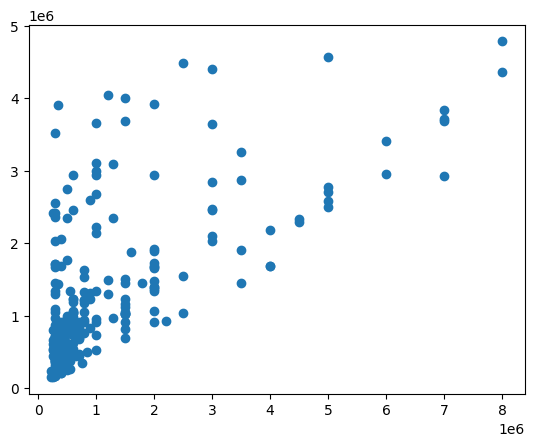

In [169]:
plt.scatter(Real_Values,predictions); 

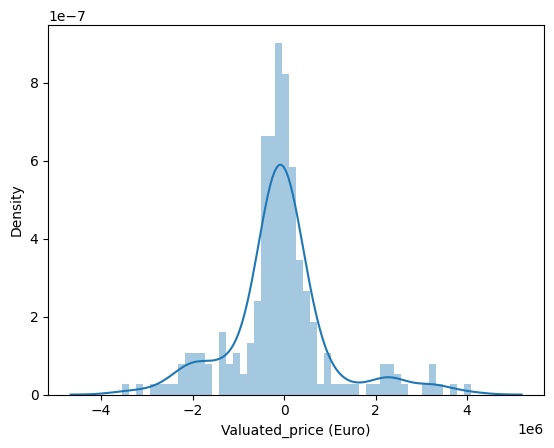

In [170]:
sns.distplot((y_test-predictions),bins=50); 